In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, cv2, random
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def loadImages(path):
  image_files = [cv2.imread(os.path.join(path, file)) for file in os.listdir(path)[0:100]] # Mengambil image dari directory drive
  return image_files

def resizeImages(dim, images):
  image_files = [cv2.resize(image, dim, interpolation = cv2.INTER_AREA) for image in images] # Resize gambar menjadi dimensi yang ditentukan
  return image_files

def grayscaleImages(images):
  image_files = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)/255.0 for image in images] # Color image processing dari rgb menjadi grayscale
  return image_files

In [ ]:
def ImageProcessing(path):
  dim = (320, 240) # Ukuran resize
  images=loadImages(path)
  images=resizeImages(dim, images)
  images=grayscaleImages(images)
  return images

In [ ]:
def data_splitting(data, train_size):
  train_num=int(train_size*len(data[0])); test_num=int(len(data[0])-train_num)
  
  X_train = data[0][:train_num]+data[1][:train_num]+data[2][:train_num]
  X_test = data[0][-test_num:]+data[1][-test_num:]+data[2][-test_num:]
  y_train = [0 for i in range(train_num)]+[1 for i in range(train_num)]+[2 for i in range(train_num)]
  y_test = [0 for i in range(test_num)]+[1 for i in range(test_num)]+[2 for i in range(test_num)]

  return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [ ]:
def data_shuffling(X_train, X_test, y_train, y_test):
  train=list(zip(X_train, y_train))
  random.shuffle(train)
  X_train=[data[0] for data in train]
  y_train=[data[-1] for data in train]

  test=list(zip(X_test, y_test))
  random.shuffle(test)
  X_test=[data[0] for data in test]
  y_test=[data[-1] for data in test]
  return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [ ]:
image_path = "/content/drive/MyDrive/Pembelajaran Mesin/flowers"
sunflowers=ImageProcessing(image_path + '/sunflower')
dandelions = ImageProcessing(image_path + '/dandelion')
roses = ImageProcessing(image_path + '/rose')

In [ ]:
data=[sunflowers, dandelions, roses]
X_train, X_test, y_train, y_test=data_splitting(data, 0.8)

In [ ]:
# X_train, X_test, y_train, y_test=data_shuffling(X_train, X_test, y_train, y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(240,320,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                                  
])
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.1), metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 238, 318, 64)      640       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 119, 159, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 117, 157, 32)      18464     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 58, 78, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 56, 76, 8)         2312      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 28, 38, 8)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8512)             

In [ ]:
# X_train=np.expand_dims(X_train, axis=3)
# X_test=np.expand_dims(X_test, axis=3)

In [ ]:
val_data=(X_test, y_test)
history=model.fit(x=X_train, y=y_train, batch_size=20, epochs=50, verbose=1, validation_data=val_data)

Epoch 1/50
12/12 [==============================] - 1s 69ms/step - loss: 1.1073 - acc: 0.3458 - val_loss: 1.1031 - val_acc: 0.3333
Epoch 2/50
12/12 [==============================] - 1s 56ms/step - loss: 1.1012 - acc: 0.2917 - val_loss: 1.0982 - val_acc: 0.3333
Epoch 3/50
12/12 [==============================] - 1s 56ms/step - loss: 1.1029 - acc: 0.3083 - val_loss: 1.0984 - val_acc: 0.3333
Epoch 4/50
12/12 [==============================] - 1s 55ms/step - loss: 1.1003 - acc: 0.2833 - val_loss: 1.0980 - val_acc: 0.3333
Epoch 5/50
12/12 [==============================] - 1s 55ms/step - loss: 1.1011 - acc: 0.3292 - val_loss: 1.0988 - val_acc: 0.3000
Epoch 6/50
12/12 [==============================] - 1s 55ms/step - loss: 1.1000 - acc: 0.3125 - val_loss: 1.0962 - val_acc: 0.3667
Epoch 7/50
12/12 [==============================] - 1s 55ms/step - loss: 1.0927 - acc: 0.4000 - val_loss: 1.0859 - val_acc: 0.4000
Epoch 8/50
12/12 [==============================] - 1s 54ms/step - loss: 1.1012 - a

# lr=0.1

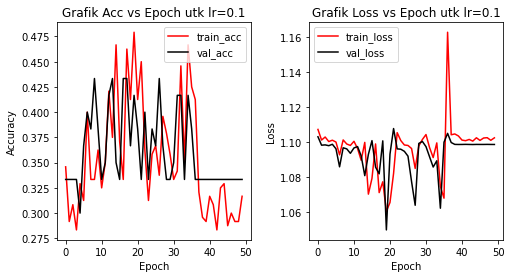

In [ ]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x=np.linspace(1,50) 

ax[0].plot(history.history['acc'], 'r', label='train_acc')
ax[0].plot(history.history['val_acc'], 'black', label='val_acc')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Grafik Acc vs Epoch utk lr=0.1')
ax[0].legend()

ax[1].plot(history.history['loss'], 'r', label='train_loss')
ax[1].plot(history.history['val_loss'], 'black', label='val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Grafik Loss vs Epoch utk lr=0.1')
ax[1].legend()

# lr=0.8

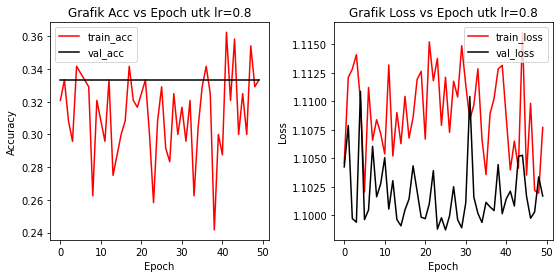

In [ ]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(9,4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x=np.linspace(1,50) 

ax[0].plot(history.history['acc'], 'r', label='train_acc')
ax[0].plot(history.history['val_acc'], 'black', label='val_acc')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Grafik Acc vs Epoch utk lr=0.8')
ax[0].legend()

ax[1].plot(history.history['loss'], 'r', label='train_loss')
ax[1].plot(history.history['val_loss'], 'black', label='val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Grafik Loss vs Epoch utk lr=0.8')
ax[1].legend()